## Full Repo

https://github.com/MostafaBelo/Konecta_Assignments/tree/main

## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Prints all unique items per column as well as how many different unique items are there
def print_uniques(df):
    for key in df:
        uq_items = df[key].unique()
        if (len(uq_items) > 20):
            print(f"{key} - {len(uq_items)}\t|\tMany Items")
        else:
            print(f"{key} - {len(uq_items)}\t|\t{uq_items}")

# Counts how many empty values are there per column
def count_empty(df):
    return ((df == "ERROR") | (df == "UNKNOWN") | (df.isnull()) | (df == "unknown") | (df == "error")).sum()

## 1) Initial Exploration

In [3]:
df = pd.read_csv("dirty_cafe_sales.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [5]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [6]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [7]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [8]:
print_uniques(df)

Transaction ID - 10000	|	Many Items
Item - 11	|	['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice' 'Tea']
Quantity - 8	|	['2' '4' '5' '3' '1' 'ERROR' 'UNKNOWN' nan]
Price Per Unit - 9	|	['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan 'ERROR' 'UNKNOWN']
Total Spent - 20	|	['4.0' '12.0' 'ERROR' '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' nan 'UNKNOWN' '2.0' '1.0' '7.5' '4.5' '1.5']
Payment Method - 6	|	['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' nan]
Location - 5	|	['Takeaway' 'In-store' 'UNKNOWN' nan 'ERROR']
Transaction Date - 368	|	Many Items


In [9]:
count_empty(df)

Transaction ID         0
Item                 969
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

## 2) Handle Missing or Placeholder Entries

In [10]:
df2 = df.copy()

df2[df2 == "ERROR"] = np.nan
df2[df2 == "UNKNOWN"] = np.nan
df2[df2.isnull()] = np.nan

print_uniques(df2)

Transaction ID - 10000	|	Many Items
Item - 9	|	['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' nan 'Sandwich' 'Juice' 'Tea']
Quantity - 6	|	['2' '4' '5' '3' '1' nan]
Price Per Unit - 7	|	['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan]
Total Spent - 18	|	['4.0' '12.0' nan '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' '2.0' '1.0' '7.5' '4.5' '1.5']
Payment Method - 4	|	['Credit Card' 'Cash' nan 'Digital Wallet']
Location - 3	|	['Takeaway' 'In-store' nan]
Transaction Date - 366	|	Many Items


## 3) Impute Logical Relationships

In [11]:
df2["Quantity"] = df2["Quantity"].astype("Int32")
df2["Price Per Unit"] = df2["Price Per Unit"].astype("Float32")
df2["Total Spent"] = df2["Total Spent"].astype("Float32")

df2 = df2.convert_dtypes()

df2.loc[df2["Total Spent"].isnull(), "Total Spent"] = df2["Quantity"] * df2["Price Per Unit"]
df2.loc[df2["Quantity"].isnull(), "Quantity"] = df2["Total Spent"] / df2["Price Per Unit"]
df2.loc[df2["Price Per Unit"].isnull(), "Price Per Unit"] = df2["Total Spent"] / df2["Quantity"]

df3 = df2.dropna(subset=["Total Spent", "Quantity", "Price Per Unit"]).copy()

count_empty(df2), len(df2), len(df3)

(Transaction ID         0
 Item                 969
 Quantity              38
 Price Per Unit        38
 Total Spent           40
 Payment Method      3178
 Location            3961
 Transaction Date     460
 dtype: Int64,
 10000,
 9942)

## 4) Normalize Date Column

In [12]:
# Step 1: Convert to datetime, coerce errors (invalid formats → NaT)
df3["Transaction Date"] = pd.to_datetime(df3["Transaction Date"], errors="coerce")

# Step 2: Sort by Transaction Date
df3.sort_values("Transaction Date", inplace=True)

# Step 3: Fill missing dates using forward-fill, then backward-fill (for leading NaNs)
df3["Transaction Date"] = df3["Transaction Date"].ffill().bfill()

df3.dtypes

Transaction ID      string[python]
Item                string[python]
Quantity                     Int32
Price Per Unit             Float32
Total Spent                Float32
Payment Method      string[python]
Location            string[python]
Transaction Date    datetime64[ns]
dtype: object

## 5) Standardize Categorical Columns

In [13]:
df3.dtypes

Transaction ID      string[python]
Item                string[python]
Quantity                     Int32
Price Per Unit             Float32
Total Spent                Float32
Payment Method      string[python]
Location            string[python]
Transaction Date    datetime64[ns]
dtype: object

In [14]:
df3["Item"] = df3["Item"].str.lower()
df3["Payment Method"] = df3["Payment Method"].str.lower()
df3["Location"] = df3["Location"].str.lower()

df3["Item"] = df3["Item"].str.strip()
df3["Payment Method"] = df3["Payment Method"].str.strip()
df3["Location"] = df3["Location"].str.strip()

df3.loc[df3["Item"].isnull(), "Item"] = "unknown"
df3.loc[df3["Payment Method"] == "digital wallet", "Payment Method"] = "card"
df3.loc[df3["Payment Method"] == "credit card", "Payment Method"] = "card"
df3.loc[df3["Payment Method"].isnull(), "Payment Method"] = "unknown"
df3.loc[df3["Location"].isnull(), "Location"] = "unknown"

print_uniques(df3), len(df3)

Transaction ID - 9942	|	Many Items
Item - 9	|	<StringArray>
['sandwich',      'tea',   'coffee',     'cake',    'juice',    'salad',
   'cookie', 'smoothie',  'unknown']
Length: 9, dtype: string
Quantity - 5	|	<IntegerArray>
[5, 2, 1, 3, 4]
Length: 5, dtype: Int32
Price Per Unit - 6	|	<FloatingArray>
[4.0, 1.5, 2.0, 3.0, 5.0, 1.0]
Length: 6, dtype: Float32
Total Spent - 17	|	<FloatingArray>
[20.0,  7.5,  4.0,  9.0,  8.0,  3.0, 12.0, 10.0, 15.0,  4.5,  2.0,  5.0,  6.0,
  1.5, 16.0, 25.0,  1.0]
Length: 17, dtype: Float32
Payment Method - 3	|	<StringArray>
['card', 'unknown', 'cash']
Length: 3, dtype: string
Location - 3	|	<StringArray>
['in-store', 'takeaway', 'unknown']
Length: 3, dtype: string
Transaction Date - 365	|	Many Items


(None, 9942)

## 6) Remove Duplicates

In [15]:
df3.drop_duplicates(inplace=True)

print_uniques(df3), len(df3)

Transaction ID - 9942	|	Many Items
Item - 9	|	<StringArray>
['sandwich',      'tea',   'coffee',     'cake',    'juice',    'salad',
   'cookie', 'smoothie',  'unknown']
Length: 9, dtype: string
Quantity - 5	|	<IntegerArray>
[5, 2, 1, 3, 4]
Length: 5, dtype: Int32
Price Per Unit - 6	|	<FloatingArray>
[4.0, 1.5, 2.0, 3.0, 5.0, 1.0]
Length: 6, dtype: Float32
Total Spent - 17	|	<FloatingArray>
[20.0,  7.5,  4.0,  9.0,  8.0,  3.0, 12.0, 10.0, 15.0,  4.5,  2.0,  5.0,  6.0,
  1.5, 16.0, 25.0,  1.0]
Length: 17, dtype: Float32
Payment Method - 3	|	<StringArray>
['card', 'unknown', 'cash']
Length: 3, dtype: string
Location - 3	|	<StringArray>
['in-store', 'takeaway', 'unknown']
Length: 3, dtype: string
Transaction Date - 365	|	Many Items


(None, 9942)

## 7) Type Conversion & Validation

In [16]:
df3["Transaction ID"] = df3["Transaction ID"].astype("string")
df3["Item"] = df3["Item"].astype("string")

df3["Quantity"] = df3["Quantity"].astype("int32")
df3["Price Per Unit"] = df3["Price Per Unit"].astype("float32")
df3["Total Spent"] = df3["Total Spent"].astype("float32")

df3["Payment Method"] = df3["Payment Method"].astype("string")
df3["Location"] = df3["Location"].astype("string")

df3["Transaction Date"] = pd.to_datetime(df3["Transaction Date"], errors="coerce")

df3.dtypes

Transaction ID      string[python]
Item                string[python]
Quantity                     int32
Price Per Unit             float32
Total Spent                float32
Payment Method      string[python]
Location            string[python]
Transaction Date    datetime64[ns]
dtype: object

## 8) Outlier Detection

##### Quantity, and Price Per Unit both seem to not have any outliers. Since Total Spent is the product of the other two columns, the variety in the Total Spent doesn't seem that large or abnormal

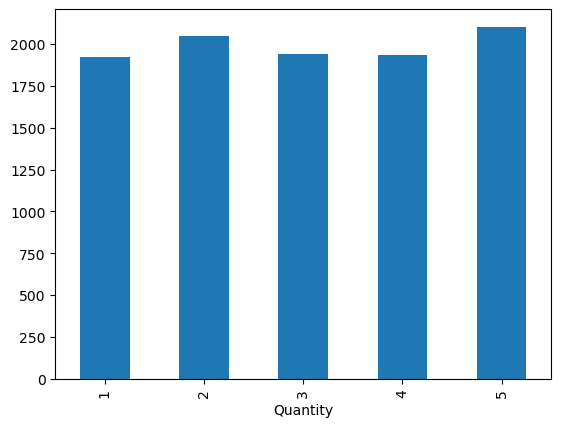

In [17]:
# Count frequency of values
value_counts = df3["Quantity"].value_counts()

value_counts.sort_index(inplace=True)

# Plot as bar chart
value_counts.plot(kind="bar");

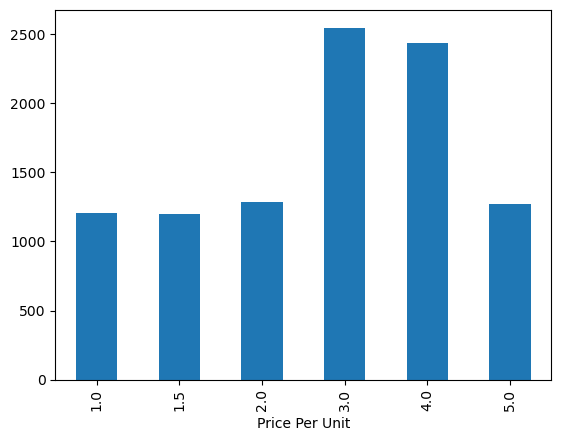

In [18]:
# Count frequency of values
value_counts = df3["Price Per Unit"].value_counts()

value_counts.sort_index(inplace=True)

# Plot as bar chart
value_counts.plot(kind="bar");

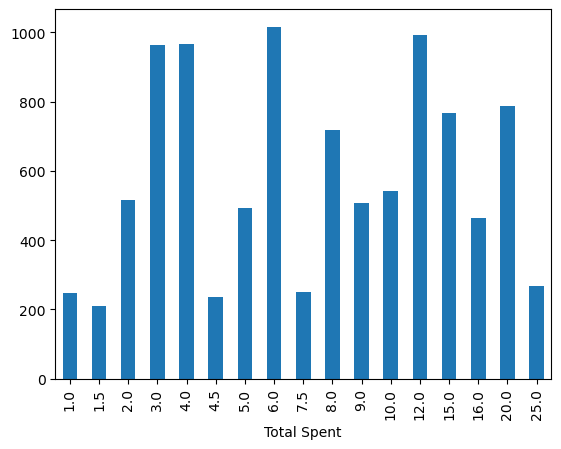

In [19]:
# Count frequency of values
value_counts = df3["Total Spent"].value_counts()

value_counts.sort_index(inplace=True)

# Plot as bar chart
value_counts.plot(kind="bar");

## 9) Feature Engineering & Derived Columns

In [20]:
df3["Transaction Month"] = df3["Transaction Date"].dt.month
df3["Transaction Weekday"] = df3["Transaction Date"].dt.day_name()

# No Hour since the original data only comprised the date (day/month/year), so .hour is just zeros
# df3["Transaction Hour"] = df3["Transaction Date"].dt.hour

print_uniques(df3)

Transaction ID - 9942	|	Many Items
Item - 9	|	<StringArray>
['sandwich',      'tea',   'coffee',     'cake',    'juice',    'salad',
   'cookie', 'smoothie',  'unknown']
Length: 9, dtype: string
Quantity - 5	|	[5 2 1 3 4]
Price Per Unit - 6	|	[4.  1.5 2.  3.  5.  1. ]
Total Spent - 17	|	[20.   7.5  4.   9.   8.   3.  12.  10.  15.   4.5  2.   5.   6.   1.5
 16.  25.   1. ]
Payment Method - 3	|	<StringArray>
['card', 'unknown', 'cash']
Length: 3, dtype: string
Location - 3	|	<StringArray>
['in-store', 'takeaway', 'unknown']
Length: 3, dtype: string
Transaction Date - 365	|	Many Items
Transaction Month - 12	|	[ 1  2  3  4  5  6  7  8  9 10 11 12]
Transaction Weekday - 7	|	['Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday']


In [21]:
avg_item_price = df3.groupby("Item")["Price Per Unit"].mean()

avg_item_price

Item
cake        3.00000
coffee      2.00000
cookie      1.00000
juice       3.00000
salad       5.00000
sandwich    4.00000
smoothie    4.00000
tea         1.50000
unknown     2.92731
Name: Price Per Unit, dtype: float32

In [22]:
location_freq = df3.groupby("Item")["Location"].value_counts().unstack(fill_value=0)
location_freq

Location,in-store,takeaway,unknown
Item,,,
cake,319,341,474
coffee,318,350,490
cookie,328,361,395
juice,361,338,468
salad,367,343,434
sandwich,367,340,415
smoothie,321,300,468
tea,326,334,421
unknown,291,297,375


In [23]:
avg_spent_per_location = df3.groupby("Location")["Total Spent"].mean()

avg_spent_per_location

Location
in-store    9.030354
takeaway    8.804094
unknown     8.954315
Name: Total Spent, dtype: float32